In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Employee_Performance_and_Productivity.csv')
dataset.head()
#dataset.columns
#dataset.info()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [3]:
dataset = dataset.drop(['Employee_ID', 'Hire_Date', 'Work_Hours_Per_Week', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size'], axis = 1)
dataset.head()

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Projects_Handled,Overtime_Hours,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,IT,Male,55,Specialist,2,High School,5,6750.0,32,22,66,0,2.63,False
1,Finance,Male,29,Developer,0,High School,5,7500.0,34,13,61,2,1.72,False
2,Finance,Male,55,Specialist,8,High School,3,5850.0,27,6,1,0,3.17,False
3,Customer Support,Female,48,Analyst,7,Bachelor,2,4800.0,10,28,0,1,1.86,False
4,Engineering,Female,36,Analyst,3,Bachelor,2,4800.0,11,29,9,1,1.25,False


In [4]:
dataset.isna().sum()

Department                     0
Gender                         0
Age                            0
Job_Title                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Projects_Handled               0
Overtime_Hours                 0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

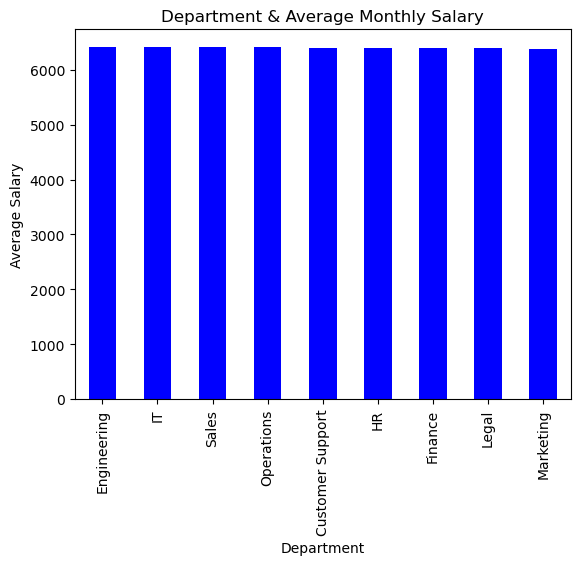

In [5]:
#dataset.groupby('Department')['Monthly_Salary'].mean().sort_values(ascending=False)
dataset.groupby('Department')['Monthly_Salary'].mean().sort_values(ascending=False).plot(kind='bar', color='Blue')
plt.title('Department & Average Monthly Salary')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.show()

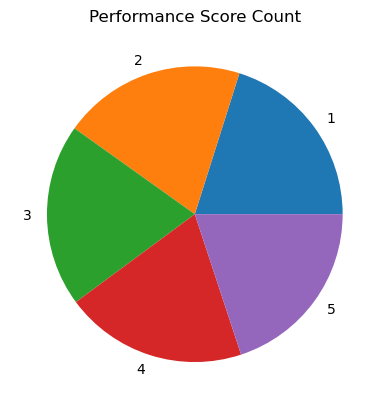

In [6]:
dataset['Performance_Score'].value_counts().plot(kind='pie')
plt.title('Performance Score Count')
plt.ylabel('')
plt.show()

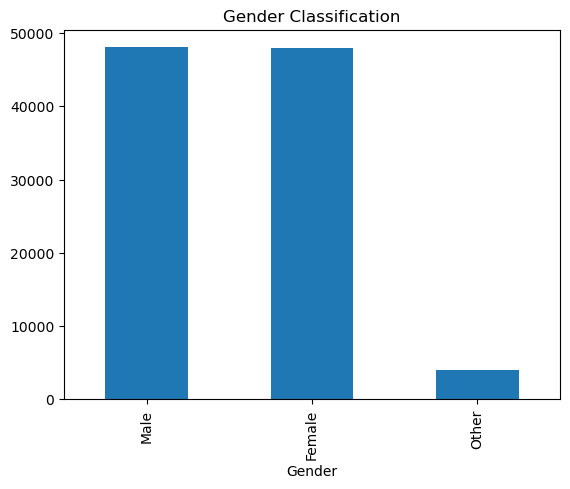

In [7]:
dataset['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Classification')
plt.show()

In [8]:
dataset.groupby('Department')['Years_At_Company'].mean().sort_values(ascending=False)

Department
Marketing           4.504458
Engineering         4.488956
Customer Support    4.487675
Finance             4.481429
HR                  4.473996
Operations          4.473571
Sales               4.469430
Legal               4.469059
IT                  4.435990
Name: Years_At_Company, dtype: float64

In [9]:
dataset.groupby('Department')['Overtime_Hours'].mean().sort_values(ascending=False)

Department
IT                  14.672716
Engineering         14.593282
HR                  14.577099
Legal               14.548390
Operations          14.520794
Sales               14.513757
Marketing           14.482792
Customer Support    14.383951
Finance             14.344911
Name: Overtime_Hours, dtype: float64

In [10]:
dataset.groupby(['Department', 'Performance_Score'])['Overtime_Hours'].mean()

Department        Performance_Score
Customer Support  1                    14.304464
                  2                    14.418025
                  3                    14.748092
                  4                    14.149146
                  5                    14.300226
Engineering       1                    14.464953
                  2                    14.712191
                  3                    14.595946
                  4                    14.570896
                  5                    14.618502
Finance           1                    14.387211
                  2                    14.240463
                  3                    14.283740
                  4                    14.343501
                  5                    14.475252
HR                1                    14.711942
                  2                    14.758087
                  3                    14.484793
                  4                    14.517415
                  5              

In [11]:
numeric_datas = dataset.select_dtypes(include=['number'])
numeric_datas
numeric_datas.corr()

,Age,Years_At_Company,Performance_Score,Monthly_Salary,Projects_Handled,Overtime_Hours,Training_Hours,Promotions,Employee_Satisfaction_Score
Age,1.000000,0.000078,0.001598,0.002757,-0.001726,0.001875,0.002045,-0.002888,-0.000124
Years_At_Company,0.000078,1.000000,0.001598,-0.000645,0.002963,0.001965,0.002696,-0.002737,-0.003180
Performance_Score,0.001598,0.001598,1.000000,0.510035,0.000640,-0.001312,0.002358,-0.003501,0.001696
Monthly_Salary,0.002757,-0.000645,0.510035,1.000000,-0.001925,-0.003029,-0.001088,-0.001940,0.001083
Projects_Handled,-0.001726,0.002963,0.000640,-0.001925,1.000000,0.004107,0.002211,-0.002344,0.006126
Overtime_Hours,0.001875,0.001965,-0.001312,-0.003029,0.004107,1.000000,0.002939,-0.002537,0.001052
Training_Hours,0.002045,0.002696,0.002358,-0.001088,0.002211,0.002939,1.000000,0.000933,-0.001489
Promotions,-0.002888,-0.002737,-0.003501,-0.001940,-0.002344,-0.002537,0.000933,1.000000,0.000227
Employee_Satisfaction_Score,-0.000124,-0.003180,0.001696,0.001083,0.006126,0.001052,-0.001489,0.000227,1.000000


In [12]:
#Use double [[]] to include the columns
x = dataset[['Years_At_Company', 'Monthly_Salary', 'Overtime_Hours', 'Promotions', 'Employee_Satisfaction_Score']]
y = dataset['Performance_Score']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

from sklearn.metrics import accuracy_score

def model_performance(predictions):
    print('Accuracy : {}'.format(accuracy_score(y_test, predictions)))

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)
model.predict(x_test)
predictions = model.predict(x_test)
model_performance(predictions)

Accuracy : 0.3147


In [14]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors' : [3, 5, 7, 9, 11],
              'weights' : ['uniform', 'distance']}

gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
gridkn.fit(x_train, y_train)

gridkn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [15]:
predictions = gridkn.predict(x_test)
model_performance(predictions)

Accuracy : 0.4968


In [ ]:
from sklearn.svm import SVC
svm = SVC()

param_grid = {
    'C' : [0.01, 0.1, 0.5, 1],
    'kernel' : ['linear', 'rbf', 'poly']
}

gridsvc = GridSearchCV(svm, param_grid, cv=5)
gridsvc.fit(x_train, y_train)

In [ ]:
y_pred = gridsvc.predict(x_test)

model_performance(y_pred)